In [1]:
import glob
import numpy as np
import openslide
import cv2
import matplotlib.pyplot as plt
import os
import tqdm
graph_root = '/mnt/s1/lhm/gdph_luad/graph/'

In [2]:
data_list = glob.glob(
    "/mnt/nfs5/zsxm/2024.8.12广东省人民医院移动硬盘数据/肺腺癌/第2次给的I-III期肺腺癌WSI+肿瘤区mask/GDPH_WSI/*.svs")

In [3]:
from utils_single import multi_process_exec
def cut_patch(d):
    slide = openslide.open_slide(d)
    code = d.split('/')[-1].split('.svs')[0]
    w,h = slide.level_dimensions[2]
    patch_16 = np.array(slide.read_region((0,0),2,(w,h)).convert("RGB"))
    cv2.imwrite(f"{graph_root}{code}.ori.png",patch_16)
multi_process_exec(cut_patch, data_list)

  0%|          | 0/300 [00:00<?, ?it/s]

Not a JPEG file: starts with 0x11 0x00
Not a JPEG file: starts with 0x11 0x00
Not a JPEG file: starts with 0x11 0x00
Not a JPEG file: starts with 0x11 0x00
Not a JPEG file: starts with 0x11 0x00


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [18]:
import pandas as pd
rows = pd.read_csv("/mnt/s1/lhm/gdph_luad/data_list.csv")
codes = []
patches = glob.glob("/mnt/s1/lhm/gdph_luad/graph/*.ori.png")
for d in patches:
   code = d.split('/')[-1].split(".ori.png")[0]+".svs"
   codes.append(code)
res = []
data_records = rows.to_dict("records")
for r in data_records:
    filename = r["WSI_filename"]
    if filename in codes:
        res.append(r)
res_pd = pd.DataFrame(res)
res_pd.head()
# res_pd.to_csv("/mnt/s1/lhm/gdph_luad/data_list_for_graph.csv")

,Unnamed: 0,pathology_id,WSI_filename,mask_filename,sex,age,smoke,T_stage,N_stage,overall_stage,...,vascular_invasion,wedge_resection,tumor_size,DFS_status,DFS_month,OS_status,OS_month,surgery_year,slide_id,label
0,0,385277,385277-B1.svs,385277-B1_mask.png,2,69,0,2,0.0,1,...,0,0,1.5,0,139.672131,0,139.672131,2007,385277-B1.svs,0
1,1,387709,387709-3.svs,387709-3_mask.png,1,69,0,2,0.0,1,...,0,0,2.5,1,182.000000,1,182.000000,2007,387709-3.svs,0
2,2,391807,391807-9.10.svs,391807-9.10_mask.png,2,57,0,1,0.0,1,...,0,0,1.3,0,136.655738,0,136.655738,2008,391807-9.10.svs,0
3,3,396367,396367.svs,396367_mask.png,2,33,0,3,2.0,3,...,0,0,6.0,1,9.934426,1,14.852459,2008,396367.svs,1
4,4,396635,396635.svs,396635_mask.png,1,69,1,2,0.0,1,...,0,0,3.0,0,137.639344,0,137.639344,2008,396635.svs,0


In [10]:
# img = slide.read_region((offset[1]*64,offset[0]*64),3,(size[1]*8,size[0]*8)).convert('RGB')

In [ ]:
import os

for i in range(img.shape[0]//1024):
    for j in range(img.shape[1]//1024):
        patch = img[i*1024:(i+1)*1024,j*1024:(j+1)*1024,:]
        # 设置黑色像素的阈值
        threshold = 10
        # 创建掩码，将小于阈值的像素设置为0，其余设置为1
        _, mask = cv2.threshold(patch, threshold, 255, cv2.THRESH_BINARY)
        
        # 计算黑色像素的数量
        black_pixels = np.sum(mask == 0)
        
        # 计算图像的总像素数
        total_pixels = patch.shape[0] * patch.shape[1]
        
        # 计算黑色像素的比例
        black_pixel_ratio = black_pixels/3 / total_pixels
        print(black_pixel_ratio)
        if black_pixel_ratio > 0.03:
            continue
        if not os.path.exists(f'{patch_root}/tissue/{code}'):
            os.mkdir(f'{patch_root}/tissue/{code}')
        cv2.imwrite(f'{patch_root}/tissue/{code}/{i}_{j}.png',patch)

In [ ]:
img.shape

In [ ]:
for gd in graphs:
    g = np.load(gd,allow_pickle=True).item()
    y = g['y']
    code = g['code']
    offset = g['offset']
    size = g['size']
    try:
        slide = openslide.OpenSlide(f'{slide_root}/{y}/{code}.mrxs')
        img = slide.read_region((offset[1]*64,offset[0]*64),3,(size[1]*8,size[0]*8)).convert('RGB')
    except Exception as e:
        print(e)
        continue
    img = np.array(img)
    i = 0
    while i < (img.shape[0]*8//1024):
        j = 0
        while j  < (img.shape[1]*8//1024):
            print(i,j)
            patch = img[i*1024:(i+1)*1024,j*1024:(j+1)*1024,:]
            # 设置黑色像素的阈值
            threshold = 10
            
            # 创建掩码，将小于阈值的像素设置为0，其余设置为1
            _, mask = cv2.threshold(patch, threshold, 255, cv2.THRESH_BINARY)
            
            # 计算黑色像素的数量
            black_pixels = np.sum(mask == 0)
            
            # 计算图像的总像素数
            total_pixels = patch.shape[0] * patch.shape[1]
            
            # 计算黑色像素的比例
            black_pixel_ratio = black_pixels/3 / total_pixels
            # print(black_pixel_ratio)
            if black_pixel_ratio > 0.03:
                continue
            if not os.path.exists(f'{patch_root}/tissue/{code}'):
                os.mkdir(f'{patch_root}/tissue/{code}')
            cv2.imwrite(f'{patch_root}/tissue/{code}/{i}_{j}.png',patch)
            j+=1
        i+=1
          

# 提取 cell 层级的 patch

In [ ]:
for gd in graphs:
    g = np.load(gd,allow_pickle=True).item()
    y = g['y']
    code = g['code']
    offset = g['offset']
    size = g['size']
    try:
        slide = openslide.OpenSlide(f'{slide_root}/{y}/{code}.mrxs')
    except Exception as e:
        print(e)
        continue
    i=0
    while i < (size[1]*64//1024):
        i+=25
        j=0
        while j < (size[0]*64//1024):
            j+=25
            print(i,j)
            patch = slide.read_region((offset[1]*64+i*1024,offset[0]*64+j*1024),1,(1024,1024)).convert('RGB')
            patch = np.array(patch)
            threshold = 10
            
            # 创建掩码，将小于阈值的像素设置为0，其余设置为1
            _, mask = cv2.threshold(patch, threshold, 255, cv2.THRESH_BINARY)
            
            # 计算黑色像素的数量
            black_pixels = np.sum(mask == 0)
            
            # 计算图像的总像素数
            total_pixels = patch.shape[0] * patch.shape[1]
            
            # 计算黑色像素的比例
            black_pixel_ratio = black_pixels/3 / total_pixels
            if black_pixel_ratio > 0.03:
                continue
            print(black_pixel_ratio)
            if not os.path.exists(f'{patch_root}/cell/{code}'):
                os.mkdir(f'{patch_root}/cell/{code}')
            cv2.imwrite(f'{patch_root}/cell/{code}/{i}_{j}.png',patch)

In [30]:
for gd in graphs:
    g = np.load(gd,allow_pickle=True).item()
    y = g['y']
    code = g['code']
    offset = g['offset']
    size = g['size']
    try:
        slide = openslide.OpenSlide(f'{slide_root}/{y}/{code}.mrxs')
    except Exception as e:
        print(e)
        continue
    print(size)
    i=0
    print((size[1]*8//1024), (size[0]*8//1024))
    while i < (size[1]*8//1024):
        j=0
        i+=2
        while j < (size[0]*8//1024):
            print(i,j)
            j+=3
            patch = slide.read_region((offset[1]*64+i*1024*8,offset[0]*64+j*1024*8),3,(1024,1024)).convert('RGB')
            patch = np.array(patch)
            threshold = 10
            
            # 创建掩码，将小于阈值的像素设置为0，其余设置为1
            _, mask = cv2.threshold(patch, threshold, 255, cv2.THRESH_BINARY)
            
            # 计算黑色像素的数量
            black_pixels = np.sum(mask == 0)
            
            # 计算图像的总像素数
            total_pixels = patch.shape[0] * patch.shape[1]
            
            # 计算黑色像素的比例
            black_pixel_ratio = black_pixels/3 / total_pixels
            if black_pixel_ratio > 0.03:
                continue
            print(black_pixel_ratio)
            if not os.path.exists(f'{patch_root}/tissue/{code}'):
                os.mkdir(f'{patch_root}/tissue/{code}')
            cv2.imwrite(f'{patch_root}/tissue/{code}/{i}_{j}.png',patch)

[1852, 1226]
9 14
2 0
9.5367431640625e-07
2 3
3.814697265625e-06
2 6
3.178914388020833e-07
2 9
5.7220458984375e-06
2 12
4 0
1.5894571940104167e-06
4 3
2.2252400716145835e-06
4 6
9.5367431640625e-07
4 9
1.9073486328125e-06
4 12
6 0
1.9073486328125e-05
6 3
1.5894571940104167e-06
6 6
3.178914388020833e-07
6 9
6 12
8 0
1.5894571940104167e-06
8 3
1.2715657552083333e-06
8 6
2.5431315104166665e-06
8 9
8 12
10 0
10 3
10 6
10 9
10 12
[718, 933]
7 5
2 0
1.5894571940104167e-06
2 3
4 0
3.178914388020833e-07
4 3
6 0
0.0
6 3
8 0
8 3
[639, 853]
6 4
2 0
2.6067097981770832e-05
2 3
4 0
4 3
6 0
6 3
[884, 894]
6 6
2 0
0.0004323323567708333
2 3
0.00017992655436197916
4 0
9.72747802734375e-05
4 3
0.00024445851643880207
6 0
0.0045928955078125
6 3
0.0001866022745768229
[1767, 1649]
12 13
2 0
0.0014489491780598958
2 3
0.001647631327311198
2 6
0.001216888427734375
2 9
2 12
4 0
0.002280553181966146
4 3
0.0015999476114908855
4 6
0.0022176106770833335
4 9
4 12
6 0
0.0018129348754882812
6 3
0.0007953643798828125
6 

((97792, 221184), (48896, 110592), (24448, 55296), (12224, 27648), (6112, 13824), (3056, 6912), (1528, 3456), (764, 1728), (382, 864), (191, 432)) (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0)


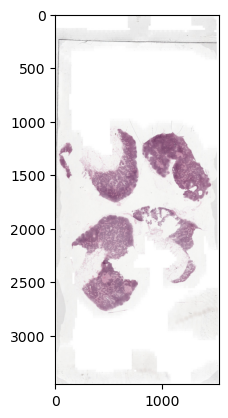

In [6]:
s = openslide.OpenSlide(f'/mnt/medical-data/yxt/CAMELYON16/training/slide/tumor/tumor-036.tif')
print(s.level_dimensions,s.level_downsamples)
thumbnail = s.read_region((0,0),6,(1528, 3456)).convert('RGB')
# plt.figure(dpi=300)
# plt.axis('off')
plt.imshow(thumbnail)
plt.show()


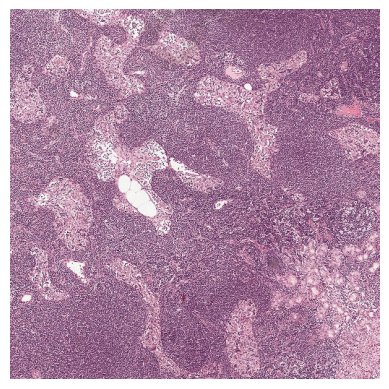

In [60]:
patch_tissue = s.read_region((600*64,1520*64),4,(512, 512)).convert('RGB')
plt.axis('off')
plt.imshow(patch_tissue)
plt.show()

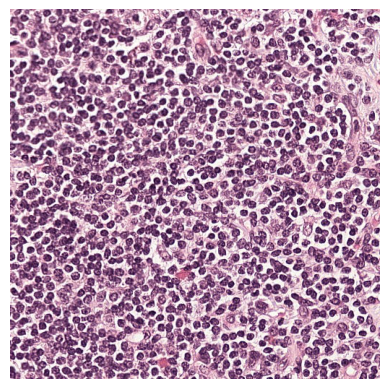

In [61]:
patch_tissue = s.read_region((600*64,1520*64),1,(512, 512)).convert('RGB')
plt.axis('off')
plt.imshow(patch_tissue)
plt.show()

((117140, 273140), (58570, 136570), (29285, 68285), (14642, 34142), (7321, 17071), (3660, 8535), (1830, 4267), (915, 2133), (457, 1066), (228, 533), (114, 266)) (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0)


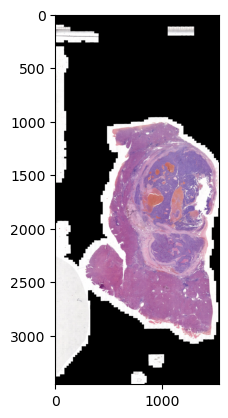

In [7]:

s = openslide.OpenSlide(f'/mnt/s3/lhm/HCC/4/201337639.mrxs')
print(s.level_dimensions,s.level_downsamples)
thumbnail = s.read_region((0,0),6,(1528, 3456)).convert('RGB')
# plt.figure(dpi=300)
# plt.axis('off')
plt.imshow(thumbnail)
plt.show()


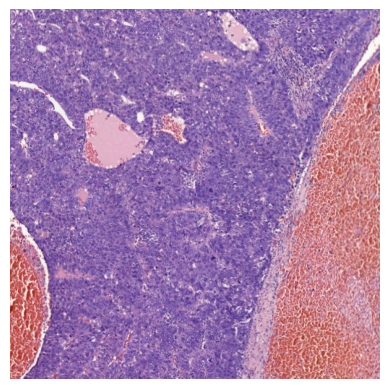

In [8]:
patch_tissue = s.read_region((1000*64,1620*64),4,(512, 512)).convert('RGB')
plt.axis('off')
plt.imshow(patch_tissue)
plt.show()

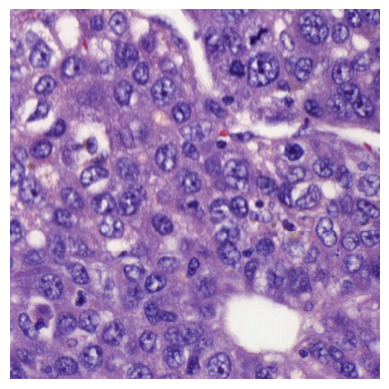

In [9]:
patch_tissue = s.read_region((1000*64,1620*64),1,(512, 512)).convert('RGB')
plt.axis('off')
plt.imshow(patch_tissue)
plt.show()